In [1]:
from Dataset2 import Dataset2
from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
train_data = mnist.train.images * 2.0 - 1.0
train_label = mnist.train.labels

batch_size = 200

source_label = 0
target_label = 1

loader = Dataset2(train_data, train_label, source_label)
# data = loader.next_batch(batch_size, negative=False)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def merge(images, size):
    if len(images.shape) == 2:
        shapes = images.shape
        # images = images.reshape( (shapes[0], int( math.sqrt(shapes[1])), int( math.sqrt(shapes[1])) ,1 ) )
        images = images.reshape((shapes[0], 28, 28, 1))

    h, w = images.shape[1], images.shape[2]
    if len(images.shape) == 4 and images.shape[-1] == 3:
        channel = 3
        img = np.zeros((h * size[0], w * size[1], channel))
        for idx, image in enumerate(images):
            i = idx % size[1]
            j = idx // size[1]
            img[j * h:j * h + h, i * w:i * w + w, :] = image

        return img
    else:
        channel = 1
        img = np.zeros((h * size[0], w * size[1]))
        for idx, image in enumerate(images):
            i = idx % size[1]
            j = idx // size[1]
            # if images.shape != 3:
            # image = image.reshape( (28, 28))
            # pdb.set_trace()
            img[j * h:j * h + h, i * w:i * w + w] = image[:, :, 0]
        return img


# f, (left, right) = plt.subplots(1, 2, figsize=(10, 5))

# left.imshow(data[0][0].reshape([28, 28]), cmap=plt.cm.Greys_r)
# right.imshow(data[2][0].reshape([28, 28]), cmap=plt.cm.Greys_r)
# plt.show()

# _, axx = plt.subplots(1, 2, figsize=(10, 20))

# for ax, cls in zip(axx, [0, 2]):
#     imgs = merge(data[cls][:100], [10, 10])
#     ax.imshow(imgs, cmap=plt.cm.Greys_r)
# plt.show()

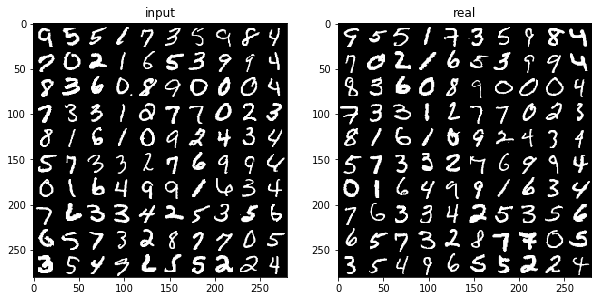

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [10]:
import matplotlib.pyplot as plt
# loader = Dataset2(train_data, train_label, source_label)
data, label, target = loader.next_batch(batch_size)
source_imgs = merge(data[:100], [10, 10])
target_imgs = merge(target[:100], [10, 10])

_, axx = plt.subplots(1, 2, figsize=(10, 20))

for ax, imgs, title in zip(axx,
                           [source_imgs, target_imgs],
                           ['input', 'real']):
    ax.imshow(imgs, cmap=plt.cm.Greys_r)
    ax.set_title(title)
plt.show()
print label[:10,:]